In [1]:
!pip install --upgrade pip
!pip install tensorflow

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/47/6a/453160888fab7c6a432a6e25f8afe6256d0d9f2cbd25971021da6491d899/pip-23.3.1-py3-none-any.whl.metadata
  Using cached pip-23.3.1-py3-none-any.whl.metadata (3.5 kB)
Using cached pip-23.3.1-py3-none-any.whl (2.1 MB)


ERROR: To modify pip, please run the following command:
C:\Users\vdako\anaconda3\envs\sam-model-env\python.exe -m pip install --upgrade pip


In [1]:
import sys
import tensorflow.keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(f"Tensor Flow Version: {tf.__version__}")
print()
print(f"Python {sys.version}")
print("GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.get_logger().setLevel('ERROR')
tf.test.is_built_with_cuda()
tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)

Tensor Flow Version: 2.13.0

Python 3.8.17 (default, Jul  5 2023, 20:44:21) [MSC v.1916 64 bit (AMD64)]
GPUs Available:  0


False

In [3]:
import pickle
dict = pickle.load(open('california-housing-dataset.pkl', 'rb'))
x_train, y_train = dict['x_train'], dict['y_train']
x_test, y_test = dict['x_test'], dict['y_test']

## Dataset Exploration


In [4]:
print(x_train.shape, y_train.shape)
print(x_train[1,:], y_train[1])

(15480, 8) (15480,)
[   2.7639        9.            8.75862069    1.72413793   66.
    2.27586207   39.04       -122.69      ] 1.125


In [5]:
features = ['MedInc', 'HouseAge' ,'AveRooms' ,'AveBedrms' ,'Population', 'AveOccup' ,'Latitude' ,'Longitude' ]

def show_dataset_min_and_max(x, y, features):
    for i in range(len(features)):
        a = x[:,i]
        print('{}; [{}, {}]'.format(features[i], min(a), max(a),))
        print('Datatype: {}'.format(a.dtype))
    print('\nMax Price: {}; Min Price: {}'.format(max(y), min(y[:])))
    

#### Non-Normalized Values


In [6]:
show_dataset_min_and_max(x_train, y_train, features)

MedInc; [0.4999, 15.0001]
Datatype: float64
HouseAge; [1.0, 52.0]
Datatype: float64
AveRooms; [0.8461538461538461, 141.9090909090909]
Datatype: float64
AveBedrms; [0.3333333333333333, 34.06666666666667]
Datatype: float64
Population; [5.0, 35682.0]
Datatype: float64
AveOccup; [0.6923076923076923, 1243.3333333333333]
Datatype: float64
Latitude; [32.54, 41.95]
Datatype: float64
Longitude; [-124.35, -114.31]
Datatype: float64

Max Price: 5.00001; Min Price: 0.14999


In [7]:
show_dataset_min_and_max(x_test, y_test, features)

MedInc; [0.4999, 15.0001]
Datatype: float64
HouseAge; [1.0, 52.0]
Datatype: float64
AveRooms; [1.3784860557768925, 52.848214285714285]
Datatype: float64
AveBedrms; [0.5714285714285714, 11.410714285714286]
Datatype: float64
Population; [3.0, 13251.0]
Datatype: float64
AveOccup; [0.75, 599.7142857142857]
Datatype: float64
Latitude; [32.55, 41.81]
Datatype: float64
Longitude; [-124.3, -114.56]
Datatype: float64

Max Price: 5.00001; Min Price: 0.225


In [8]:
print(len(y_train[np.where(y_train[np.where(y_train >= 4.8)] < 4.999)]))
print(len(y_train[y_train >=5]))
print(len(y_test[y_test >=5]))

66
751
241


In [9]:
indices_to_remove_train = np.where(y_train >= 5)[0]
indices_to_remove_test = np.where(y_test >= 5)[0]

x_train_no_5s = np.delete(x_train, indices_to_remove_train, axis=0)
y_train_no_5s = np.delete(y_train, indices_to_remove_train)
x_test_no_5s = np.delete(x_test, indices_to_remove_test, axis=0)
y_test_no_5s = np.delete(y_test, indices_to_remove_test)


In [10]:
show_dataset_min_and_max(x_train_no_5s, y_train_no_5s, features)

MedInc; [0.4999, 15.0001]
Datatype: float64
HouseAge; [1.0, 52.0]
Datatype: float64
AveRooms; [0.8461538461538461, 132.53333333333333]
Datatype: float64
AveBedrms; [0.3333333333333333, 34.06666666666667]
Datatype: float64
Population; [5.0, 35682.0]
Datatype: float64
AveOccup; [0.6923076923076923, 1243.3333333333333]
Datatype: float64
Latitude; [32.54, 41.95]
Datatype: float64
Longitude; [-124.35, -114.31]
Datatype: float64

Max Price: 4.99; Min Price: 0.14999


#### Normalized Values


In [11]:
def normalize(x):
    mean = np.mean(x, axis = 0)
    std = np.std(x, axis = 0)

    normX = (x - mean) / std

    col_max = np.max(normX, axis=0)
    col_min = np.min(normX, axis=0)
    normX = np.divide(normX - col_min, col_max - col_min)

    return normX


x_train_n = normalize(x_train_no_5s)
y_train_n = normalize(y_train_no_5s)
x_test_n = normalize(x_test_no_5s)
y_test_n = normalize(y_test_no_5s)


In [12]:
show_dataset_min_and_max(x_train_n, y_train_n, features)

MedInc; [0.0, 1.0]
Datatype: float64
HouseAge; [0.0, 1.0]
Datatype: float64
AveRooms; [0.0, 1.0]
Datatype: float64
AveBedrms; [0.0, 1.0]
Datatype: float64
Population; [0.0, 1.0]
Datatype: float64
AveOccup; [0.0, 1.0]
Datatype: float64
Latitude; [0.0, 1.0]
Datatype: float64
Longitude; [0.0, 1.0]
Datatype: float64

Max Price: 1.0; Min Price: 0.0


In [14]:
show_dataset_min_and_max(x_test_n, y_test_n, features)

MedInc; [0.0, 1.0]
Datatype: float64
HouseAge; [0.0, 1.0]
Datatype: float64
AveRooms; [0.0, 1.0]
Datatype: float64
AveBedrms; [0.0, 1.0]
Datatype: float64
Population; [0.0, 1.0]
Datatype: float64
AveOccup; [0.0, 1.0]
Datatype: float64
Latitude; [0.0, 1.0]
Datatype: float64
Longitude; [0.0, 1.0]
Datatype: float64

Max Price: 1.0; Min Price: 0.0


In [15]:
print(y_train_n.shape)
print(y_test_n.shape)

(14729,)
(4919,)


## Neural Network Design Experiments


In [13]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from keras.layers import BatchNormalization
tf.random.set_seed(1234)

In [39]:
def initialize_sequential_model(layer_sizes, activation):
    """
    Function  to initialize a sequence of layers of a given size with a given activation function.
    The input layer has been fixed to a size of 8. 
    """
    model = Sequential()
    for size in layer_sizes:
        if not model.layers : 
            model.add(Dense(size, activation=activation, input_shape=(8,))) # for first layer
        elif size == 1:
            model.add(Dense(size, activation='linear')) # for last layer
        else:
            model.add(Dense(size, activation=activation)) # for every subsequent layer
    
    return model

def visualize_and_plot(labels_predicted, ground_truth, error_functions, history, save_filename):
    """ 
    Function to visualize the predicted regression values vs the actual ones
    and plot the error on each epoch in a single plot.
    """
    n = len(error_functions) if type(error_functions) is list else 1
    fig, ax = plt.subplots(1, n + 1, figsize=(12, 3))

    # Plot predicted vs actual values
    ax[0].plot(labels_predicted, ground_truth, '.', alpha=0.1)
    ax[0].plot(ground_truth, ground_truth)
    ax[0].set_title('Predicted vs Actual')
    ax[0].set_xlabel('Predicted values')
    ax[0].set_ylabel('Actual values')
    ax[0].legend(['pred', 'gr_tr'], loc='lower right')


    if type(error_functions) is list:
        for i in range(1, len(error_functions) + 1):
            error = error_functions[i - 1];
            # Plot training history
            ax[i].plot(history[error])
            ax[i].plot(history['val_{}'.format(error)])
            ax[i].set_title(error.upper())
            ax[i].set_ylabel(error)
            ax[i].set_xlabel('Epochs')
            ax[i].legend(['train', 'val'], loc='upper right')
    else:
        ax[1].plot(history[error_functions])
        ax[1].set_title(error_functions.upper())
        ax[1].set_ylabel(error_functions)
        ax[1].set_xlabel('Epochs')
        ax[1].legend(['train'], loc='upper right')

    plt.tight_layout()
    plt.savefig(f'figures\\{save_filename}.png')
    # plt.show()

def evaluate_model_on_final_epoch(history):
    evaluation_results = {}
    for error_function in history.keys():
        evaluation_results[error_function.upper()] = history[error_function][-1]
    print(evaluation_results)
    return evaluation_results

        

In [16]:
from tensorflow.keras.models import load_model
import pickle
import os

def create_and_train_model(*args):
    layer_sizes, activation_function, epochs, optimizer, loss_function, error_functions, model_name, dataset, load_from_file = args
    x_train_n, y_train_n = dataset

    model_file = '{}/{}.h5'.format('saved_models', model_name)
    history_file = '{}/{}_history.pkl'.format('saved_models', model_name)

    if load_from_file and os.path.exists(model_file) and os.path.exists(history_file):
        model = load_model(model_file)
        with open(history_file, 'rb') as file:
            history = pickle.load(file)
        print(f"Model and history loaded from '{model_name}'")
        print(history)
    else:
        model = initialize_sequential_model(layer_sizes, activation_function)

        model.compile(loss=loss_function, 
                    optimizer=optimizer,
                    metrics=error_functions
                    )
        history = model.fit(x_train_n[:,:],  # training data
                            y_train_n[:],     # Labels
                            epochs=epochs,
                            batch_size=128,
                            verbose=0,
                            validation_split=0.2
                            ).history
        print(f"New model created and trained: {model_file}")

        model.save(model_file)
        with open(history_file, 'wb') as file:
            pickle.dump(history, file)
        print(f"Model and history saved as '{model_file}'")

    return model, history



### Evaluating Loss and Activation Functions

In [17]:
import json

def evaluate_architecture(layer_sizes, activation_functions, num_epochs, error_functions, dataset, file_name, load_from_file):

    x_train_n, y_train_n  = dataset 
    print("LAYER SIZES", layer_sizes)
    table = {}
    
    for activation_function in activation_functions:
        loss_function_table = {}
        print("====================================================================================")
        print('ACTIVATION FUNCTION: {}'. format(activation_function.upper()))
        for loss_function in error_functions:
            optimizer = tf.keras.optimizers.legacy.Adam()
            model_name = '{}-{}-{}'.format(file_name, activation_function, loss_function)
            m, h= create_and_train_model(layer_sizes, activation_function, num_epochs, optimizer, 
                                         loss_function, error_functions, model_name, 
                                         dataset, load_from_file)
            labels_predicted = m.predict(x_train_n)
            visualize_and_plot(labels_predicted, y_train_n, error_functions, h, model_name)
            metric_table = evaluate_model_on_final_epoch(h)
            loss_function_table[loss_function] = metric_table
        table[activation_function] = loss_function_table

    with open('json_outputs\\{}.json'.format(file_name), 'w') as file:
        json.dump(table, file, indent=4)

        

In [18]:
l = [16, 32, 64, 32, 16, 8, 4, 2, 1]
error_functions = ['mean_absolute_error', 'mean_squared_error', 'mean_absolute_percentage_error']
activation_functions = ['linear', 'relu', 'elu']

LAYER SIZES [16, 32, 64, 32, 16, 8, 4, 2, 1]
ACTIVATION FUNCTION: LINEAR
New model created and trained: saved_models/experiment_activation_loss-linear-mean_absolute_error.h5
Model and history saved as 'saved_models/experiment_activation_loss-linear-mean_absolute_error.h5'
  1/461 [..............................] - ETA: 34s

c:\Users\vdako\anaconda3\envs\sam-model-env\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


461/461 [==============================] - 0s 896us/step
{'LOSS': 0.09898941963911057, 'MEAN_ABSOLUTE_ERROR': 0.09898941963911057, 'MEAN_SQUARED_ERROR': 0.01882352866232395, 'MEAN_ABSOLUTE_PERCENTAGE_ERROR': 41862.3046875, 'VAL_LOSS': 0.09599684178829193, 'VAL_MEAN_ABSOLUTE_ERROR': 0.09599684178829193, 'VAL_MEAN_SQUARED_ERROR': 0.01677868142724037, 'VAL_MEAN_ABSOLUTE_PERCENTAGE_ERROR': 48113.07421875}
New model created and trained: saved_models/experiment_activation_loss-linear-mean_squared_error.h5
Model and history saved as 'saved_models/experiment_activation_loss-linear-mean_squared_error.h5'
461/461 [==============================] - 0s 930us/step
{'LOSS': 0.018054209649562836, 'MEAN_ABSOLUTE_ERROR': 0.10116954892873764, 'MEAN_SQUARED_ERROR': 0.018054209649562836, 'MEAN_ABSOLUTE_PERCENTAGE_ERROR': 44344.40234375, 'VAL_LOSS': 0.016614526510238647, 'VAL_MEAN_ABSOLUTE_ERROR': 0.09970779716968536, 'VAL_MEAN_SQUARED_ERROR': 0.016614526510238647, 'VAL_MEAN_ABSOLUTE_PERCENTAGE_ERROR': 489

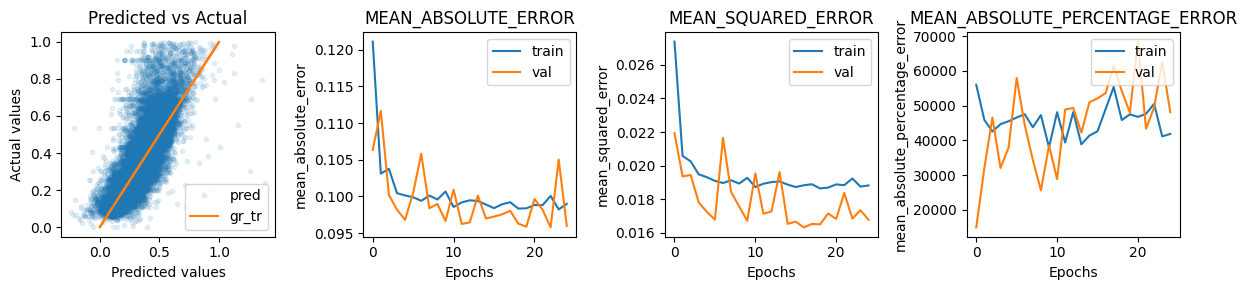

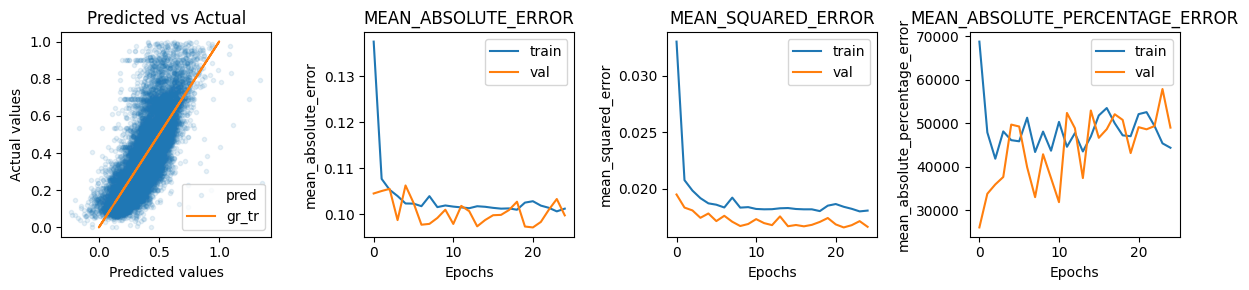

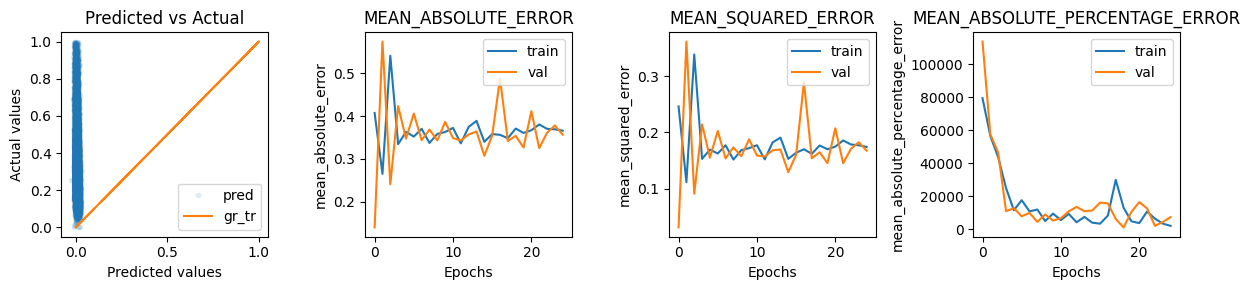

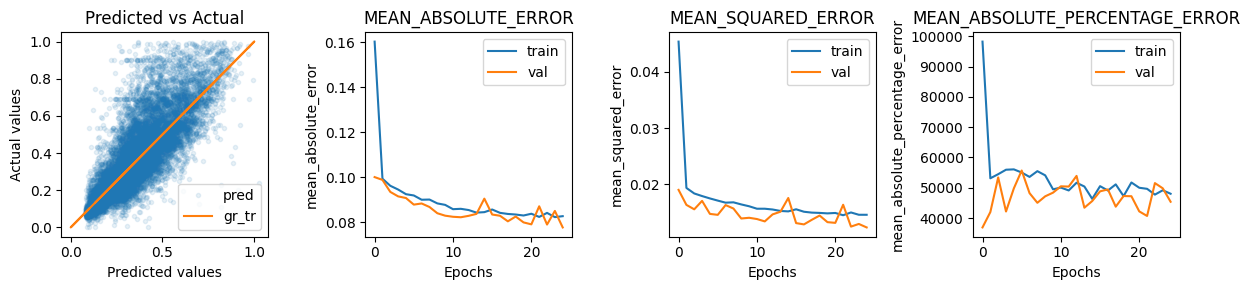

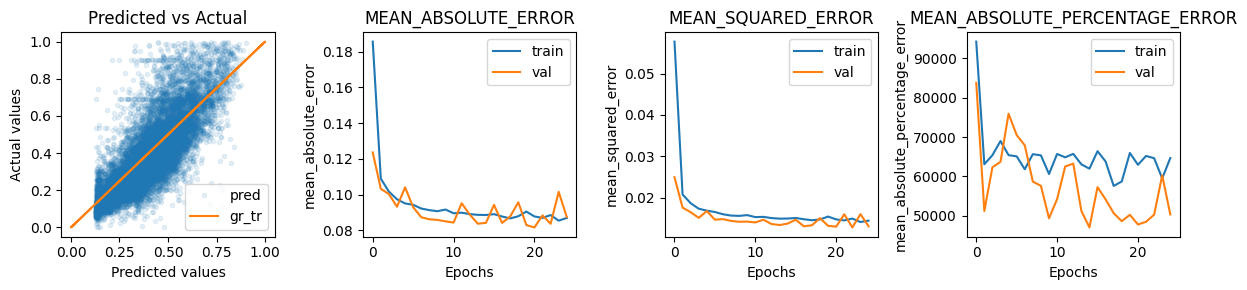

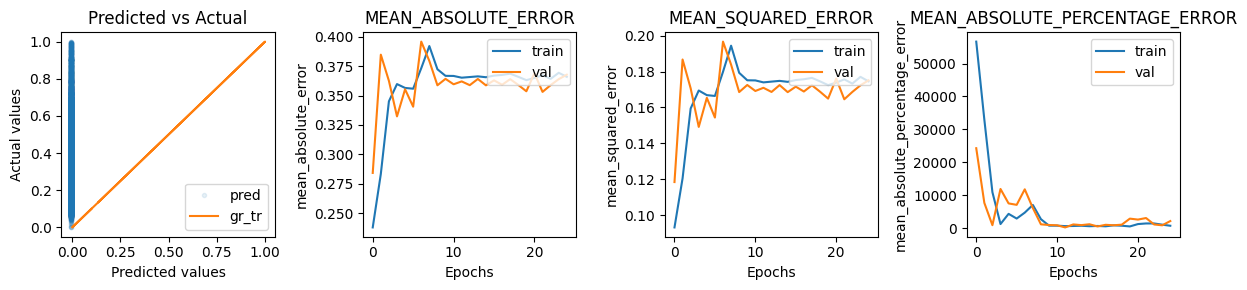

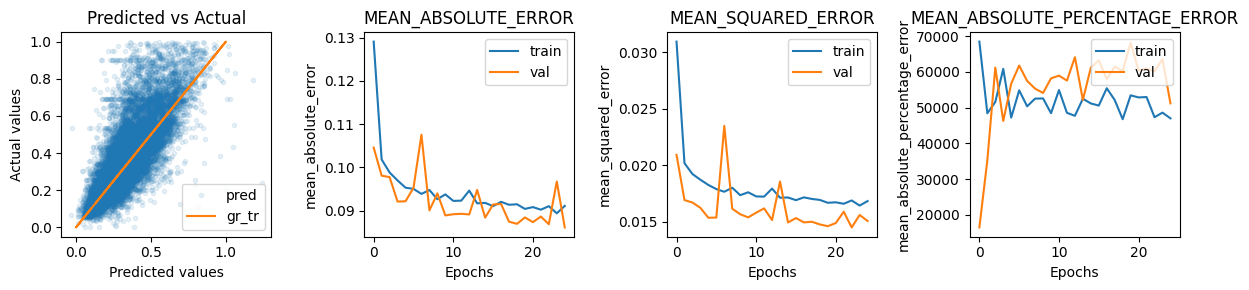

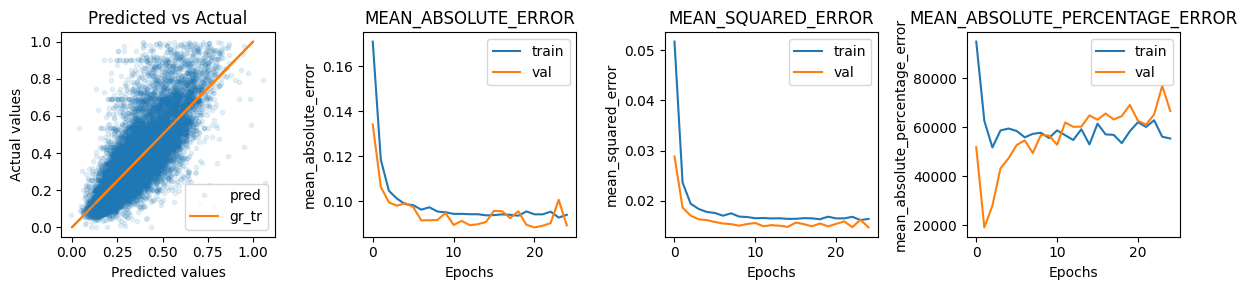

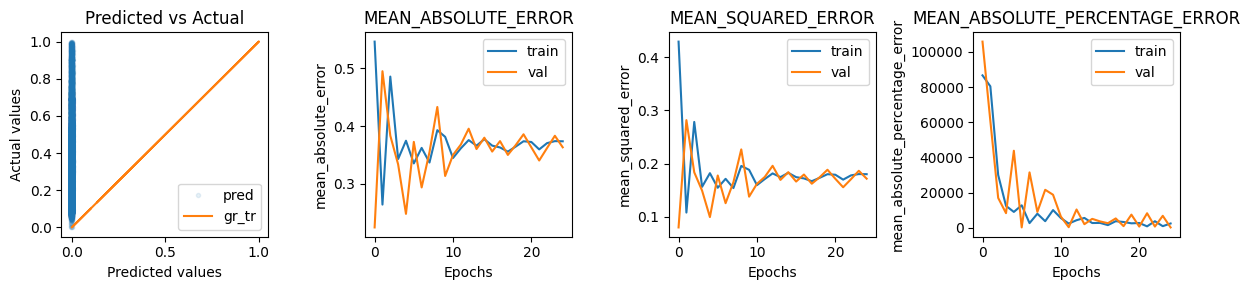

In [19]:
evaluate_architecture(l, activation_functions, 25, error_functions, [x_train_n, y_train_n], 'experiment_activation_loss', False)

LAYER SIZES [16, 32, 64, 32, 16, 8, 4, 2, 1]
ACTIVATION FUNCTION: LINEAR
Model and history loaded from 'experiment_activation_loss-linear-mean_absolute_error'
{'loss': [0.12110070884227753, 0.10311272740364075, 0.10376788675785065, 0.1004493460059166, 0.1001390665769577, 0.09989437460899353, 0.0994061678647995, 0.10012251138687134, 0.09959088265895844, 0.10067582130432129, 0.09856781363487244, 0.09918574243783951, 0.09947401285171509, 0.09938609600067139, 0.09889914095401764, 0.09840914607048035, 0.09893620014190674, 0.09921715408563614, 0.09834828972816467, 0.0983852669596672, 0.09882983565330505, 0.09880863130092621, 0.10007335245609283, 0.09823611378669739, 0.09898941963911057], 'mean_absolute_error': [0.12110070884227753, 0.10311272740364075, 0.10376788675785065, 0.1004493460059166, 0.1001390665769577, 0.09989437460899353, 0.0994061678647995, 0.10012251138687134, 0.09959088265895844, 0.10067582130432129, 0.09856781363487244, 0.09918574243783951, 0.09947401285171509, 0.0993860960006

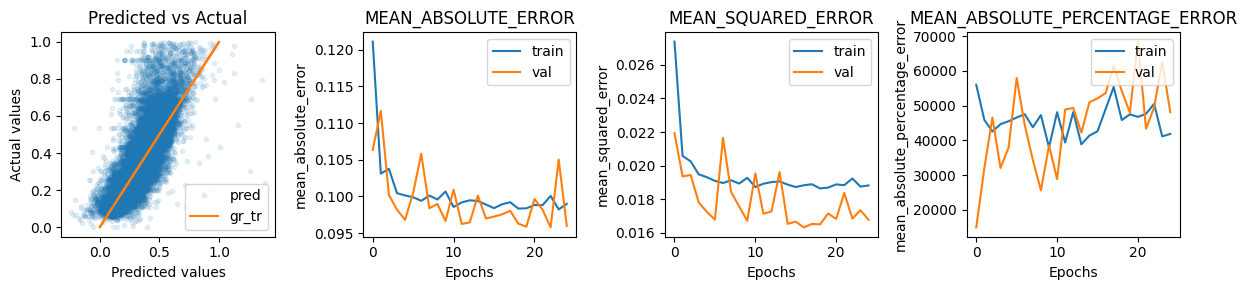

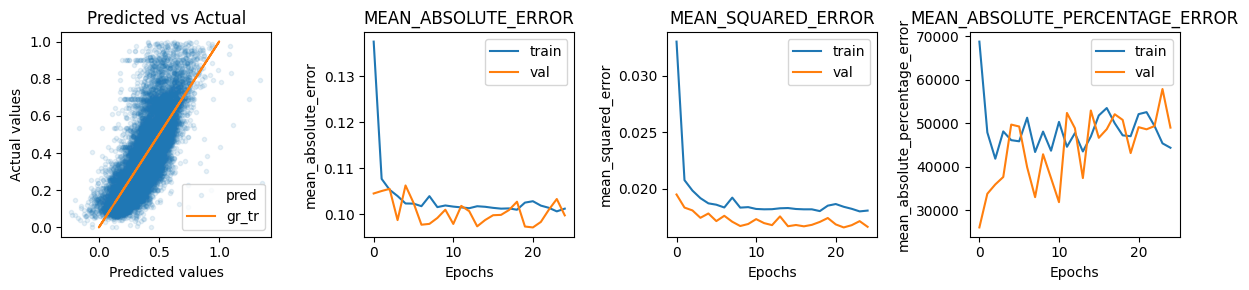

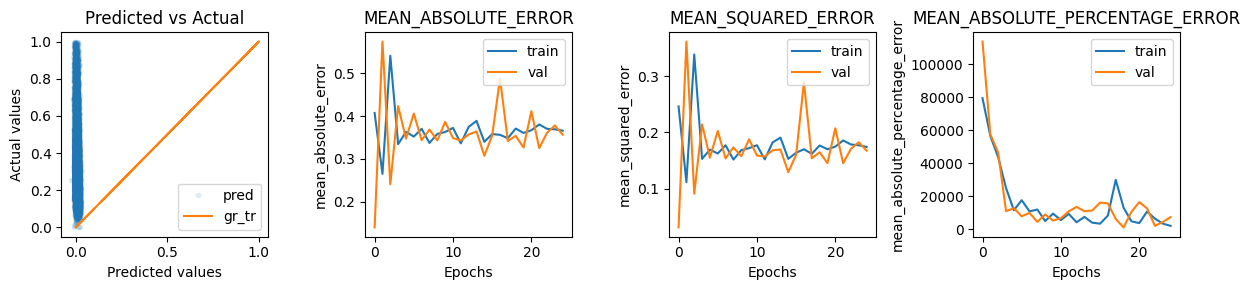

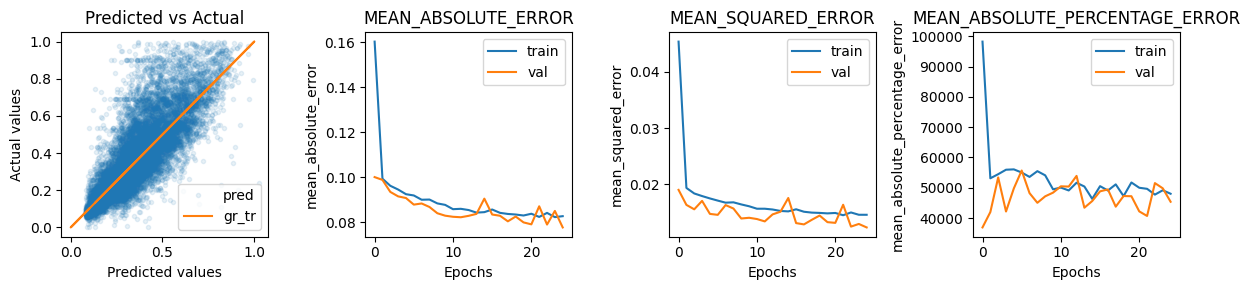

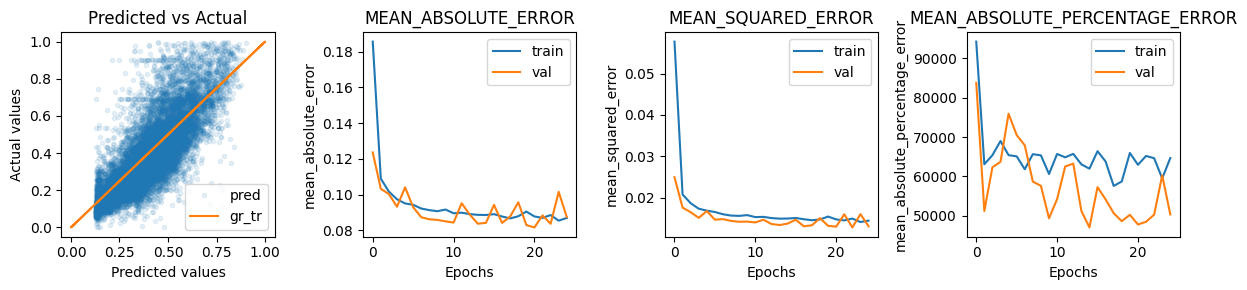

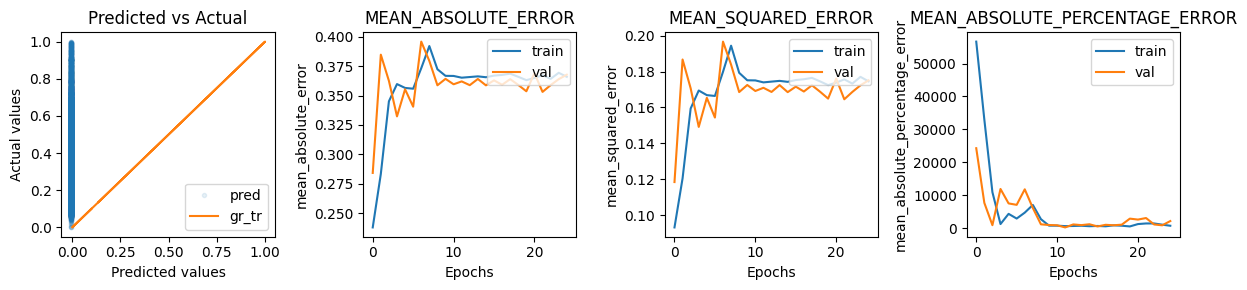

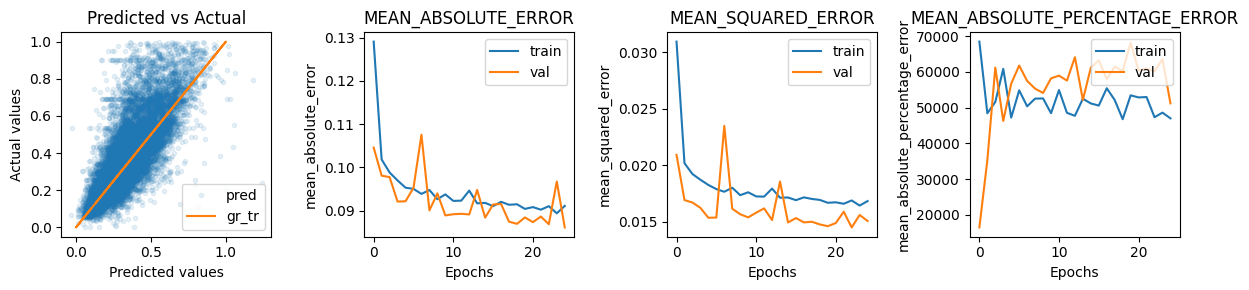

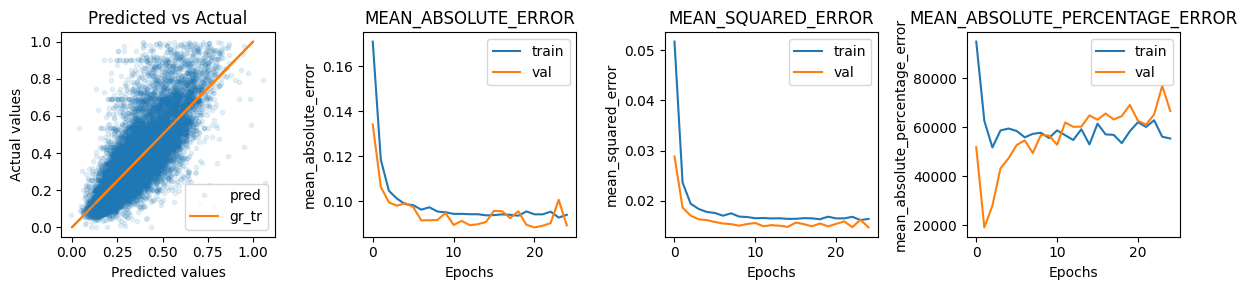

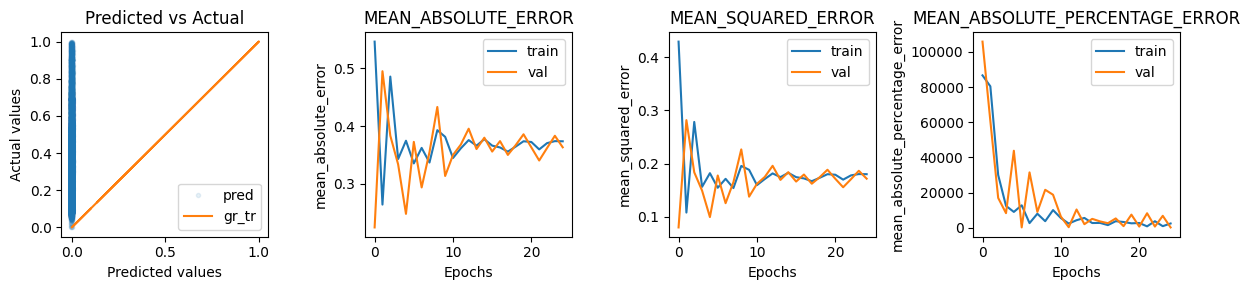

In [20]:
evaluate_architecture(l, activation_functions, 25, error_functions, [x_train_n, y_train_n], 'experiment_activation_loss', True)

In [21]:
from latex_export_functions import save_latex_table_from_json_activation_loss

save_latex_table_from_json_activation_loss('experiment_activation_loss')

### Evaluating Neural Network Layer Structures

In [24]:
activation_function = ['relu']
error_functions = ['mean_squared_error']
load_from_file = False

In [23]:
l1 = [16, 32, 64, 128, 256, 512, 1024, 512, 256, 128, 64, 32, 16, 8, 4, 2, 1]
l2 = [16, 32, 16, 8, 1]
l3 = [16, 32, 64, 32, 16, 8, 4, 2, 1]
l4 = [16, 32, 64, 128, 256, 128, 64, 32, 16, 8, 4, 1]

LAYER SIZES [16, 32, 64, 128, 256, 512, 1024, 512, 256, 128, 64, 32, 16, 8, 4, 2, 1]
ACTIVATION FUNCTION: RELU
New model created and trained: saved_models/experiment_size_[16, 32, 64, 128, 256, 512, 1024, 512, 256, 128, 64, 32, 16, 8, 4, 2, 1]-relu-mean_squared_error.h5
Model and history saved as 'saved_models/experiment_size_[16, 32, 64, 128, 256, 512, 1024, 512, 256, 128, 64, 32, 16, 8, 4, 2, 1]-relu-mean_squared_error.h5'


c:\Users\vdako\anaconda3\envs\sam-model-env\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


461/461 [==============================] - 2s 5ms/step
{'LOSS': 0.008406050503253937, 'MEAN_SQUARED_ERROR': 0.008406050503253937, 'VAL_LOSS': 0.00921723898500204, 'VAL_MEAN_SQUARED_ERROR': 0.00921723898500204}


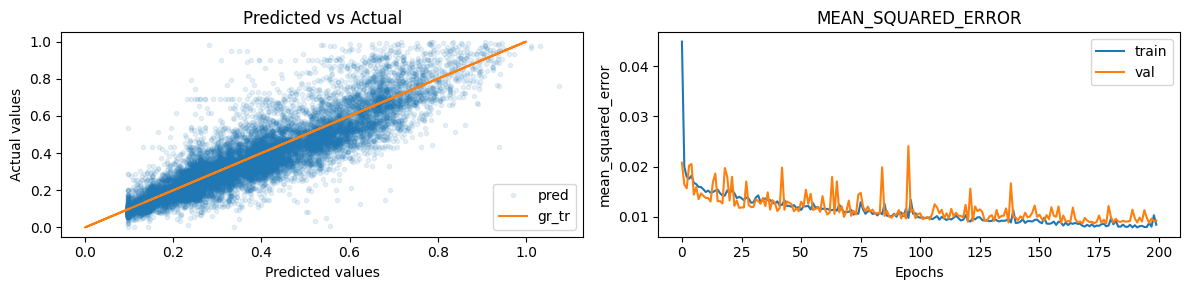

In [25]:
evaluate_architecture(l1, activation_function, 200, error_functions, [x_train_n, y_train_n], 'experiment_size_{}'.format(l1), load_from_file)

LAYER SIZES [16, 32, 16, 8, 1]
ACTIVATION FUNCTION: RELU
New model created and trained: saved_models/experiment_size_[16, 32, 16, 8, 1]-relu-mean_squared_error.h5
Model and history saved as 'saved_models/experiment_size_[16, 32, 16, 8, 1]-relu-mean_squared_error.h5'
461/461 [==============================] - 0s 876us/step
{'LOSS': 0.010417336598038673, 'MEAN_SQUARED_ERROR': 0.010417336598038673, 'VAL_LOSS': 0.010562796145677567, 'VAL_MEAN_SQUARED_ERROR': 0.010562796145677567}


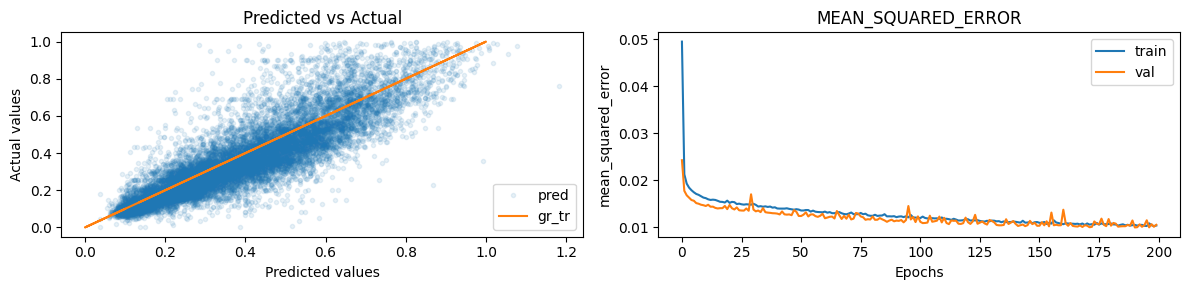

In [26]:
evaluate_architecture(l2, activation_function, 200, error_functions, [x_train_n, y_train_n], 'experiment_size_{}'.format(l2), load_from_file)

LAYER SIZES [16, 32, 64, 32, 16, 8, 4, 2, 1]
ACTIVATION FUNCTION: RELU
New model created and trained: saved_models/experiment_size_[16, 32, 64, 32, 16, 8, 4, 2, 1]-relu-mean_squared_error.h5
Model and history saved as 'saved_models/experiment_size_[16, 32, 64, 32, 16, 8, 4, 2, 1]-relu-mean_squared_error.h5'
461/461 [==============================] - 2s 3ms/step
{'LOSS': 0.009192678146064281, 'MEAN_SQUARED_ERROR': 0.009192678146064281, 'VAL_LOSS': 0.009130770340561867, 'VAL_MEAN_SQUARED_ERROR': 0.009130770340561867}


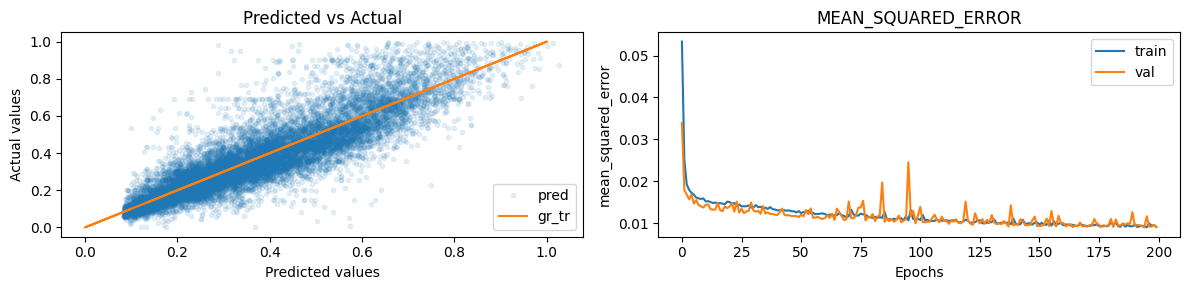

In [43]:
evaluate_architecture(l3, activation_function, 200, error_functions, [x_train_n, y_train_n], 'experiment_size_{}'.format(l3), load_from_file)

LAYER SIZES [16, 32, 64, 128, 256, 128, 64, 32, 16, 8, 4, 1]
ACTIVATION FUNCTION: LINEAR
461/461 [==============================] - 2s 3ms/step


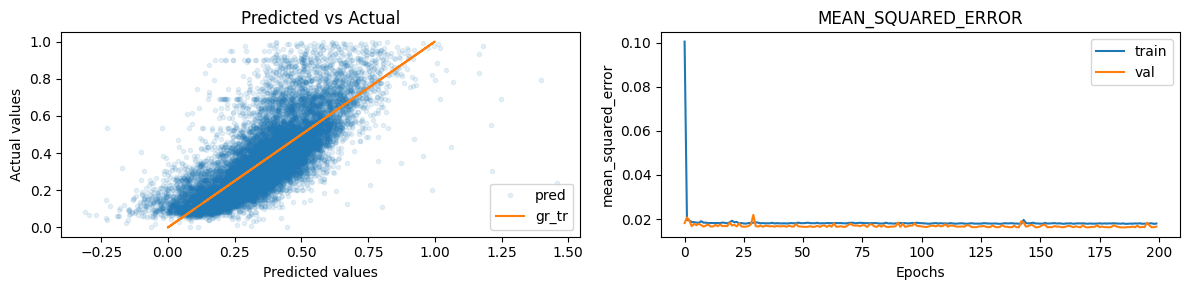

{'LOSS': 0.017962587997317314, 'MEAN_SQUARED_ERROR': 0.017962587997317314, 'VAL_LOSS': 0.016555624082684517, 'VAL_MEAN_SQUARED_ERROR': 0.016555624082684517}
ACTIVATION FUNCTION: RELU
461/461 [==============================] - 1s 1ms/step


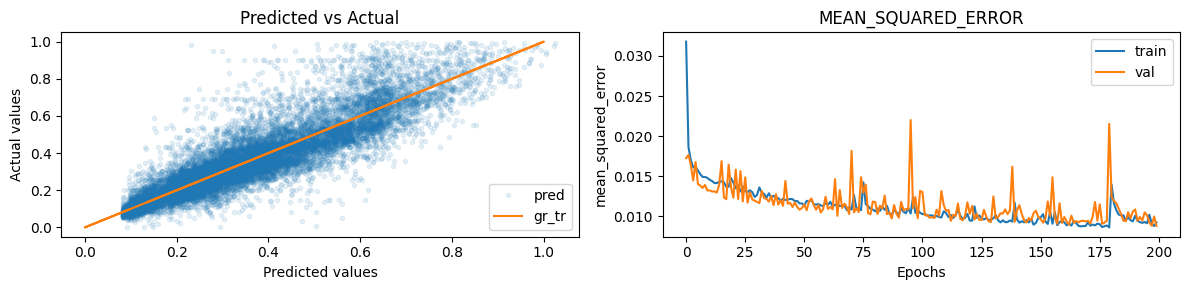

{'LOSS': 0.009225410409271717, 'MEAN_SQUARED_ERROR': 0.009225410409271717, 'VAL_LOSS': 0.008795799687504768, 'VAL_MEAN_SQUARED_ERROR': 0.008795799687504768}
ACTIVATION FUNCTION: ELU
461/461 [==============================] - 2s 3ms/step


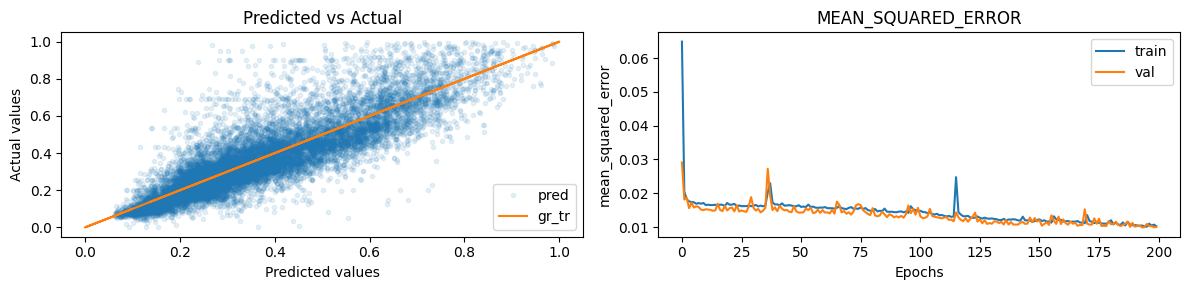

{'LOSS': 0.01026296615600586, 'MEAN_SQUARED_ERROR': 0.01026296615600586, 'VAL_LOSS': 0.010047185234725475, 'VAL_MEAN_SQUARED_ERROR': 0.010047185234725475}


In [33]:
evaluate_architecture(l4, activation_functions, 200, error_functions, [x_train_n, y_train_n], 'experiment_size_{}'.format(l4), load_from_file)

In [27]:
from latex_export_functions import create_latex_table_from_json_layer_sizes

create_latex_table_from_json_layer_sizes('experiment_size_{}'.format(l1))
create_latex_table_from_json_layer_sizes('experiment_size_{}'.format(l2))
create_latex_table_from_json_layer_sizes('experiment_size_{}'.format(l3))
create_latex_table_from_json_layer_sizes('experiment_size_{}'.format(l4))

### Optimizer Evaluation

In [28]:
initial_learning_rates = [0.1, 0.01, 0.001]
decay_rates = [1, 0.96, 0.1]
num_epochs = 100
load_from_file = False

In [29]:
num_samples = len(x_train_n) * 0.8
batch_size = 128
number_of_steps_per_epoch = num_samples / batch_size
print('Number of steps per epoch', number_of_steps_per_epoch)

Number of steps per epoch 92.05625


In [ ]:
import json
from tensorflow.keras.optimizers import Adam, SGD

def evaluate_optimizer_and_learning_rate(initial_learning_rates, decay_rates, optimizer_name, num_epochs, dataset, file_name, load_from_file):

    x_train_n, y_train_n  = dataset 
    layer_sizes = [16, 32, 64, 128, 256, 128, 64, 32, 16, 8, 4, 1]
    activation_function = 'relu'
    loss_function = 'mean_squared_error'
    table = {}

    for initial_learning_rate in initial_learning_rates:
        learning_rate_table = {}
        for decay_rate in decay_rates:
            print('INITIAL LEARNING RATE: ', initial_learning_rate)
            print('DECAY RATE: ', decay_rate)
            model_name = "{}_{}_{}".format(optimizer_name, initial_learning_rate, decay_rate)
            lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate=initial_learning_rate,
                decay_steps=10000,
                decay_rate=decay_rate)
            optimizer = None 
            if optimizer_name == 'Adam':
                optimizer = Adam(learning_rate=lr_schedule)
            elif optimizer_name == 'SGD':
                optimizer = SGD(learning_rate=lr_schedule)
            elif optimizer_name == 'SGDM_Small':
                optimizer = SGD(learning_rate=lr_schedule, momentum=0.9)
            elif optimizer_name == 'SGDM_Large':
                optimizer = SGD(learning_rate=lr_schedule, momentum=0.99)
            else:
                raise TypeError("WE SHOULDN'T END HERE")

            m, h= create_and_train_model(layer_sizes, activation_function, num_epochs, optimizer, loss_function, error_functions, model_name, dataset, load_from_file)
            labels_predicted = m.predict(x_train_n)
            visualize_and_plot(labels_predicted, y_train_n, error_functions, h, model_name)
            metric_table = evaluate_model_on_final_epoch(h)

            learning_rate_table[decay_rate] = metric_table
        table[initial_learning_rate] = learning_rate_table
        


    with open('json_outputs\\{}.json'.format(file_name), 'w') as file:
        json.dump(table, file, indent=4)

        

In [44]:
evaluate_optimizer_and_learning_rate(initial_learning_rates, decay_rates, 'Adam', 200, [x_train_n, y_train_n], 'adam_learning_rate_table', load_from_file)

INITIAL LEARNING RATE:  0.1
DECAY RATE:  1
New model created and trained: saved_models/Adam_0.1_1.h5
Model and history saved as 'saved_models/Adam_0.1_1.h5'
461/461 [==============================] - 2s 4ms/step
{'LOSS': 0.04098587855696678, 'MEAN_SQUARED_ERROR': 0.04098587855696678, 'VAL_LOSS': 0.03982696682214737, 'VAL_MEAN_SQUARED_ERROR': 0.03982696682214737}
INITIAL LEARNING RATE:  0.1
DECAY RATE:  0.96
New model created and trained: saved_models/Adam_0.1_0.96.h5
Model and history saved as 'saved_models/Adam_0.1_0.96.h5'
461/461 [==============================] - 1s 969us/step
{'LOSS': 0.040984395891427994, 'MEAN_SQUARED_ERROR': 0.040984395891427994, 'VAL_LOSS': 0.039825793355703354, 'VAL_MEAN_SQUARED_ERROR': 0.039825793355703354}
INITIAL LEARNING RATE:  0.1
DECAY RATE:  0.1
New model created and trained: saved_models/Adam_0.1_0.1.h5
Model and history saved as 'saved_models/Adam_0.1_0.1.h5'
461/461 [==============================] - 1s 1ms/step
{'LOSS': 0.04055658355355263, 'MEAN_S

INITIAL LEARNING RATE:  0.1
DECAY RATE:  1


461/461 [==============================] - 2s 4ms/step


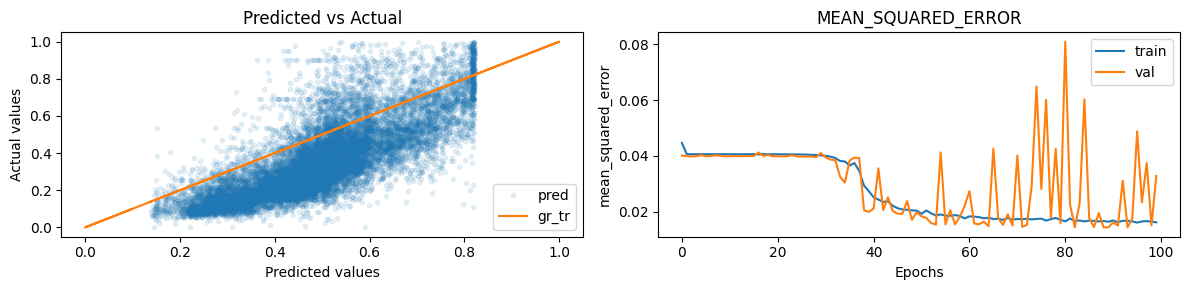

{'LOSS': 0.01615031436085701, 'MEAN_SQUARED_ERROR': 0.01615031436085701, 'VAL_LOSS': 0.03277905657887459, 'VAL_MEAN_SQUARED_ERROR': 0.03277905657887459}
INITIAL LEARNING RATE:  0.1
DECAY RATE:  0.96
461/461 [==============================] - 2s 4ms/step


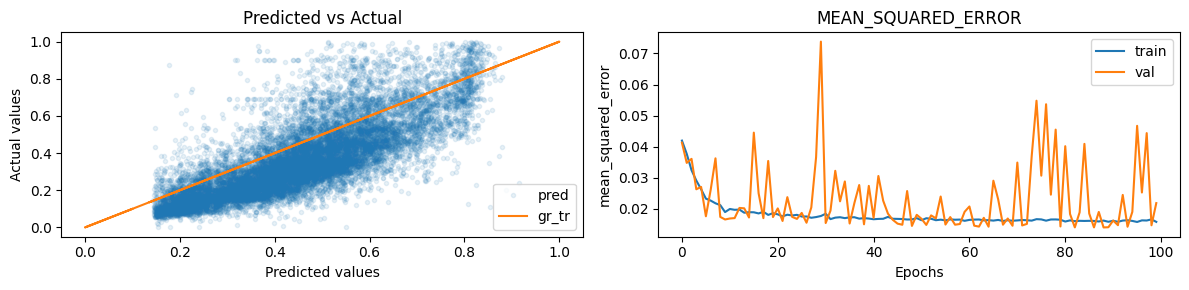

{'LOSS': 0.01584610342979431, 'MEAN_SQUARED_ERROR': 0.01584610342979431, 'VAL_LOSS': 0.02187797799706459, 'VAL_MEAN_SQUARED_ERROR': 0.02187797799706459}
INITIAL LEARNING RATE:  0.1
DECAY RATE:  0.1
461/461 [==============================] - 2s 4ms/step


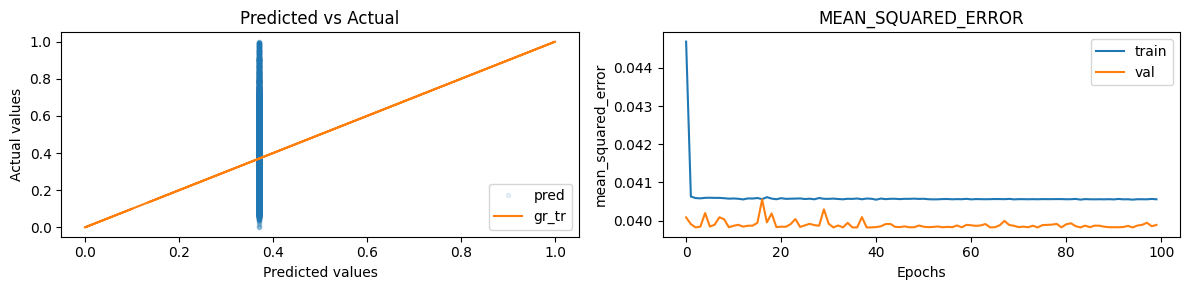

{'LOSS': 0.0405600406229496, 'MEAN_SQUARED_ERROR': 0.0405600406229496, 'VAL_LOSS': 0.03988903760910034, 'VAL_MEAN_SQUARED_ERROR': 0.03988903760910034}
INITIAL LEARNING RATE:  0.01
DECAY RATE:  1
461/461 [==============================] - 2s 5ms/step


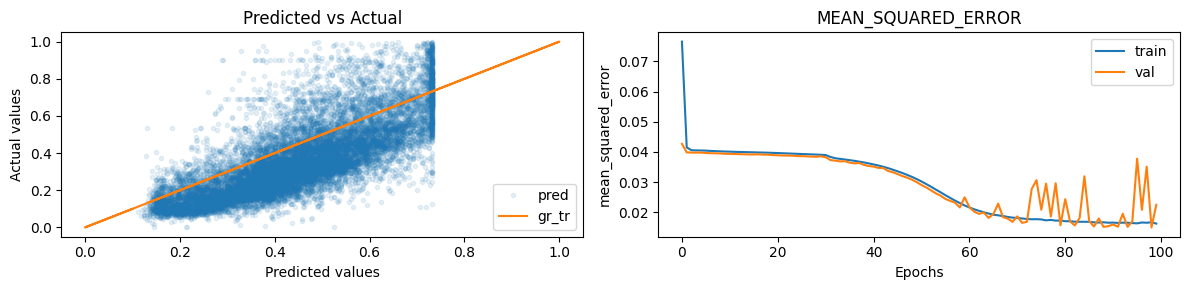

{'LOSS': 0.016252417117357254, 'MEAN_SQUARED_ERROR': 0.016252417117357254, 'VAL_LOSS': 0.022471236065030098, 'VAL_MEAN_SQUARED_ERROR': 0.022471236065030098}
INITIAL LEARNING RATE:  0.01
DECAY RATE:  0.96
461/461 [==============================] - 2s 4ms/step


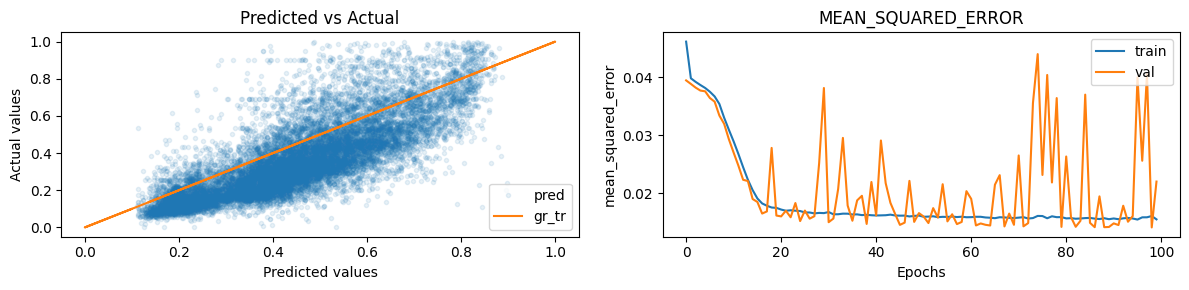

{'LOSS': 0.015487761236727238, 'MEAN_SQUARED_ERROR': 0.015487761236727238, 'VAL_LOSS': 0.022000322118401527, 'VAL_MEAN_SQUARED_ERROR': 0.022000322118401527}
INITIAL LEARNING RATE:  0.01
DECAY RATE:  0.1
461/461 [==============================] - 2s 4ms/step


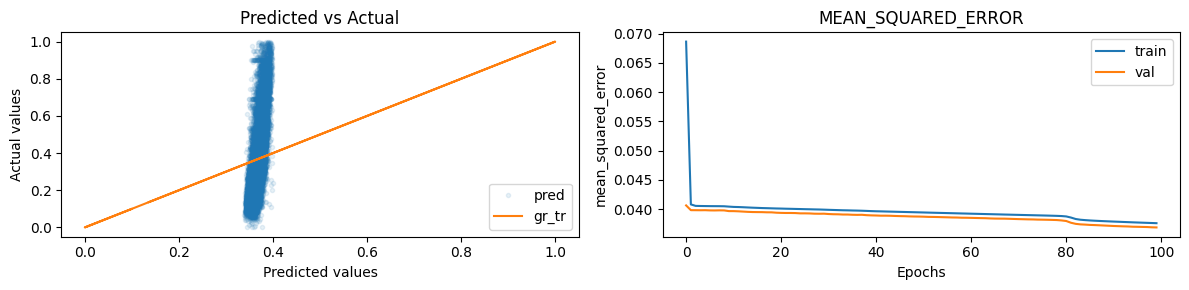

{'LOSS': 0.03759659454226494, 'MEAN_SQUARED_ERROR': 0.03759659454226494, 'VAL_LOSS': 0.03687027841806412, 'VAL_MEAN_SQUARED_ERROR': 0.03687027841806412}
INITIAL LEARNING RATE:  0.001
DECAY RATE:  1
461/461 [==============================] - 2s 4ms/step


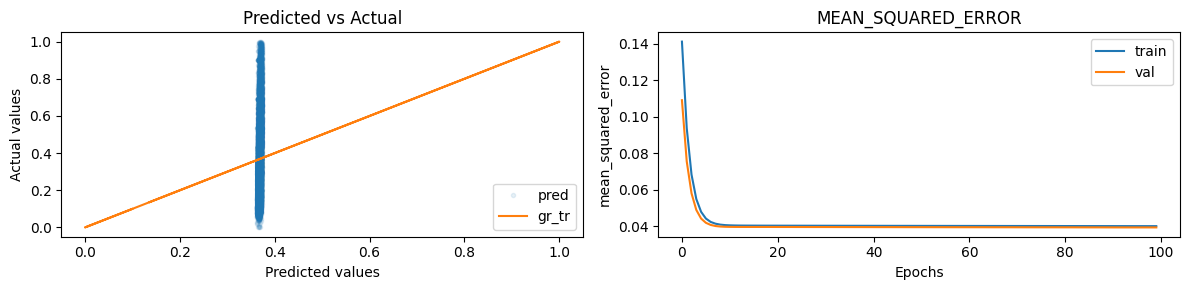

{'LOSS': 0.040146779268980026, 'MEAN_SQUARED_ERROR': 0.040146779268980026, 'VAL_LOSS': 0.039444781839847565, 'VAL_MEAN_SQUARED_ERROR': 0.039444781839847565}
INITIAL LEARNING RATE:  0.001
DECAY RATE:  0.96
461/461 [==============================] - 2s 5ms/step


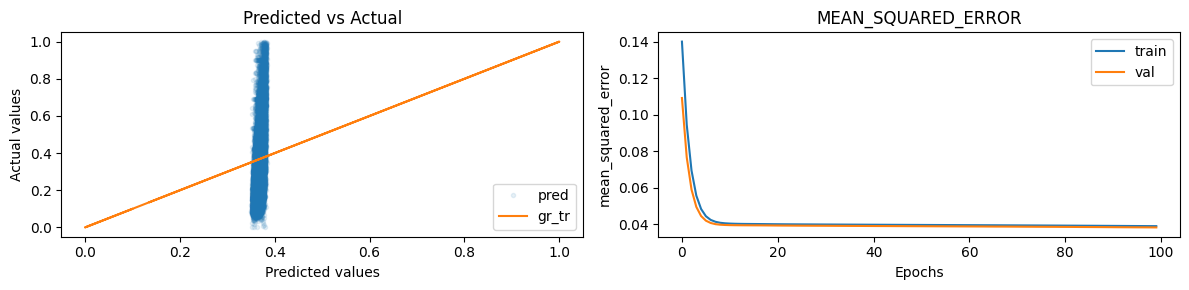

{'LOSS': 0.039079513400793076, 'MEAN_SQUARED_ERROR': 0.039079513400793076, 'VAL_LOSS': 0.03837919607758522, 'VAL_MEAN_SQUARED_ERROR': 0.03837919607758522}
INITIAL LEARNING RATE:  0.001
DECAY RATE:  0.1
461/461 [==============================] - 2s 5ms/step


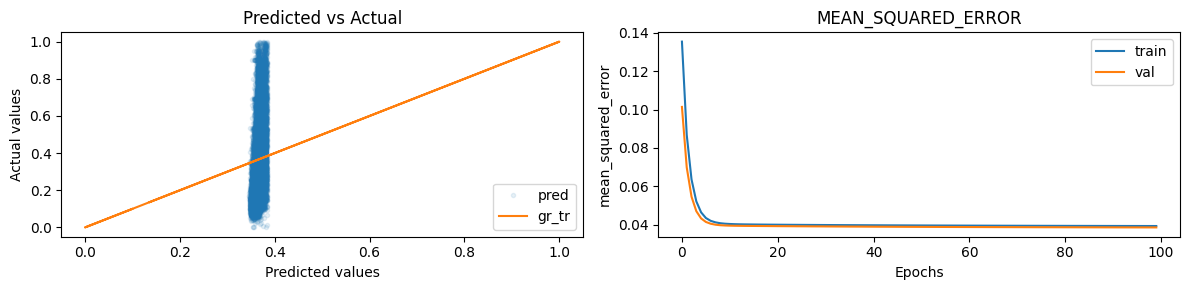

{'LOSS': 0.03934280574321747, 'MEAN_SQUARED_ERROR': 0.03934280574321747, 'VAL_LOSS': 0.03860694169998169, 'VAL_MEAN_SQUARED_ERROR': 0.03860694169998169}


In [ ]:
evaluate_optimizer_and_learning_rate(initial_learning_rates, decay_rates, 'SGD', 100, [x_train_n, y_train_n], 'sgd_learning_rate_table', load_from_file)

INITIAL LEARNING RATE:  0.1
DECAY RATE:  1
461/461 [==============================] - 2s 4ms/step


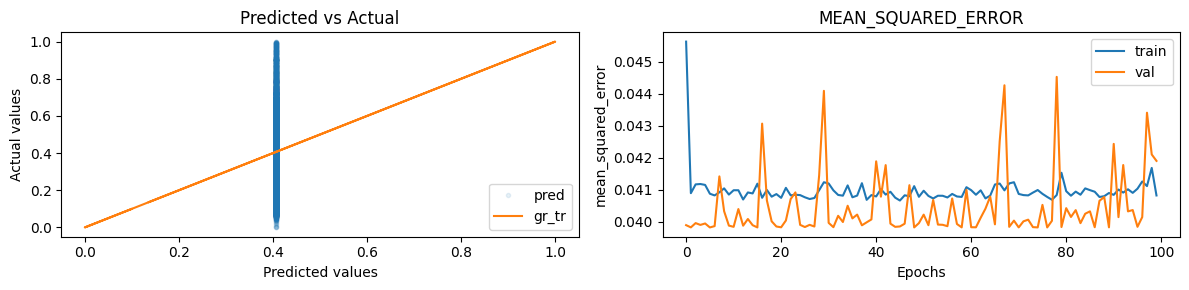

{'LOSS': 0.040821753442287445, 'MEAN_SQUARED_ERROR': 0.040821753442287445, 'VAL_LOSS': 0.04190162569284439, 'VAL_MEAN_SQUARED_ERROR': 0.04190162569284439}
INITIAL LEARNING RATE:  0.1
DECAY RATE:  0.96
461/461 [==============================] - 2s 4ms/step


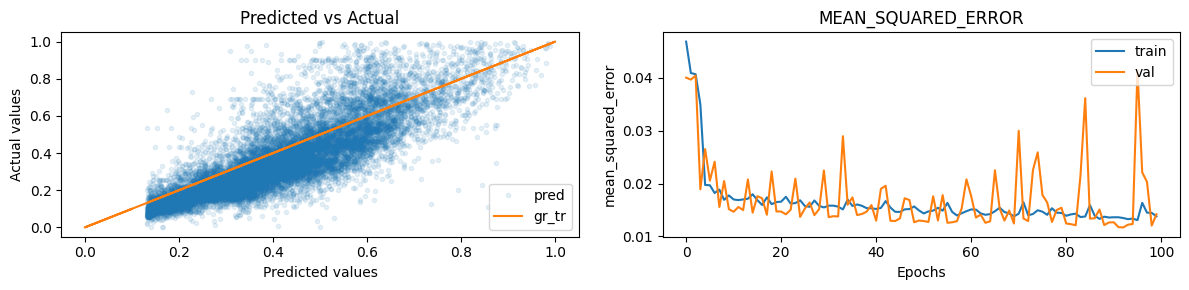

{'LOSS': 0.01380827184766531, 'MEAN_SQUARED_ERROR': 0.01380827184766531, 'VAL_LOSS': 0.014192461036145687, 'VAL_MEAN_SQUARED_ERROR': 0.014192461036145687}
INITIAL LEARNING RATE:  0.1
DECAY RATE:  0.1
461/461 [==============================] - 2s 3ms/step


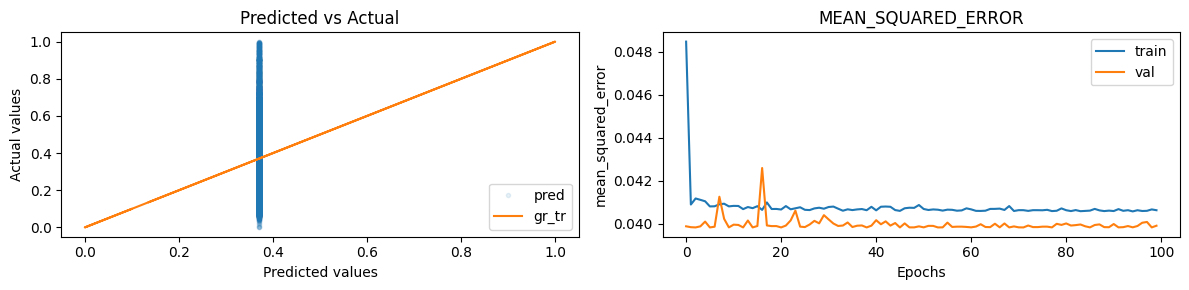

{'LOSS': 0.04062335565686226, 'MEAN_SQUARED_ERROR': 0.04062335565686226, 'VAL_LOSS': 0.03990279138088226, 'VAL_MEAN_SQUARED_ERROR': 0.03990279138088226}
INITIAL LEARNING RATE:  0.01
DECAY RATE:  1
461/461 [==============================] - 2s 4ms/step


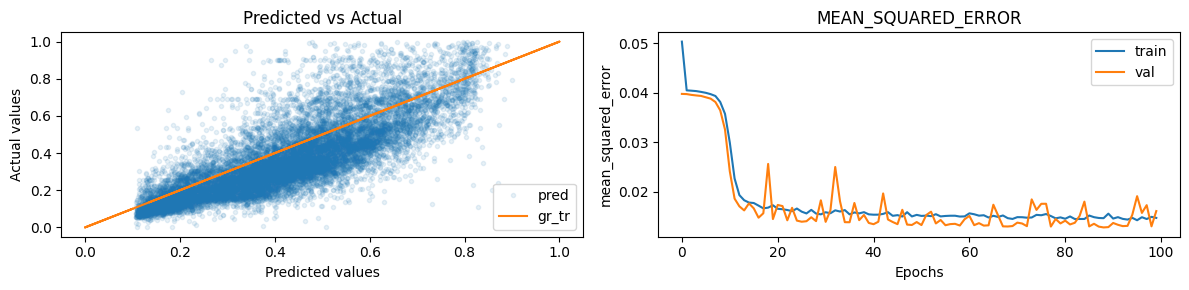

{'LOSS': 0.014750036410987377, 'MEAN_SQUARED_ERROR': 0.014750036410987377, 'VAL_LOSS': 0.016125356778502464, 'VAL_MEAN_SQUARED_ERROR': 0.016125356778502464}
INITIAL LEARNING RATE:  0.01
DECAY RATE:  0.96
461/461 [==============================] - 2s 4ms/step


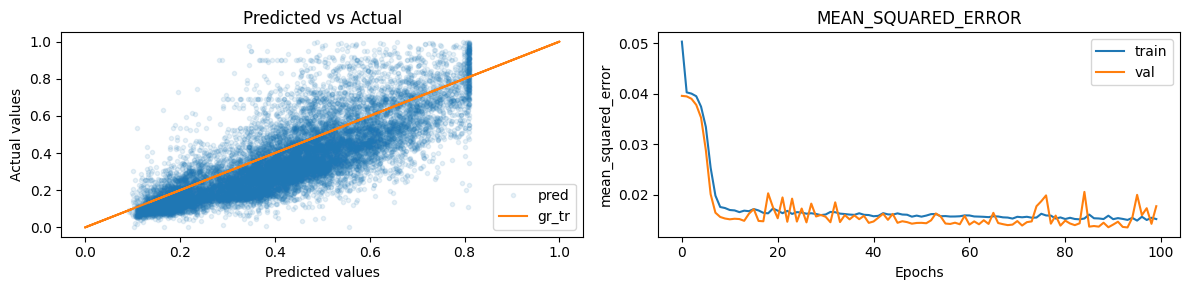

{'LOSS': 0.015192016027867794, 'MEAN_SQUARED_ERROR': 0.015192016027867794, 'VAL_LOSS': 0.017734365537762642, 'VAL_MEAN_SQUARED_ERROR': 0.017734365537762642}
INITIAL LEARNING RATE:  0.01
DECAY RATE:  0.1
461/461 [==============================] - 2s 4ms/step


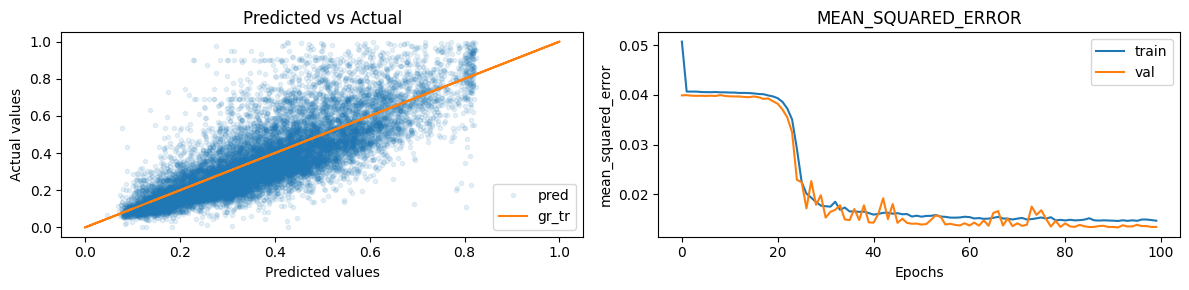

{'LOSS': 0.014662780798971653, 'MEAN_SQUARED_ERROR': 0.014662780798971653, 'VAL_LOSS': 0.013421103358268738, 'VAL_MEAN_SQUARED_ERROR': 0.013421103358268738}
INITIAL LEARNING RATE:  0.001
DECAY RATE:  1
461/461 [==============================] - 2s 4ms/step


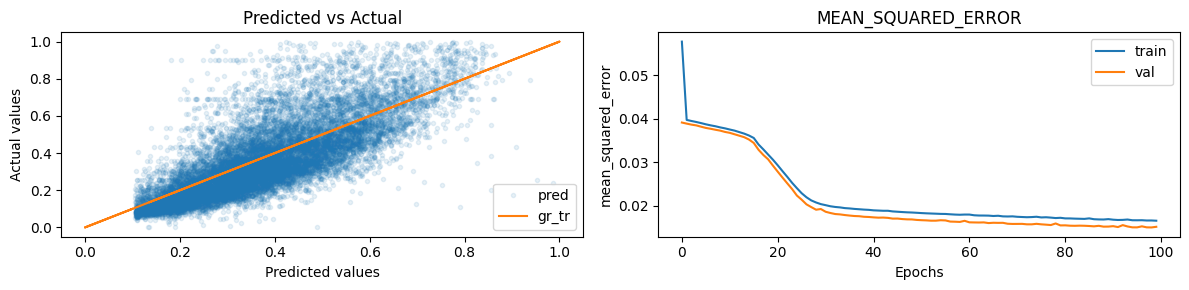

{'LOSS': 0.01661120168864727, 'MEAN_SQUARED_ERROR': 0.01661120168864727, 'VAL_LOSS': 0.015213741920888424, 'VAL_MEAN_SQUARED_ERROR': 0.015213741920888424}
INITIAL LEARNING RATE:  0.001
DECAY RATE:  0.96
461/461 [==============================] - 2s 3ms/step


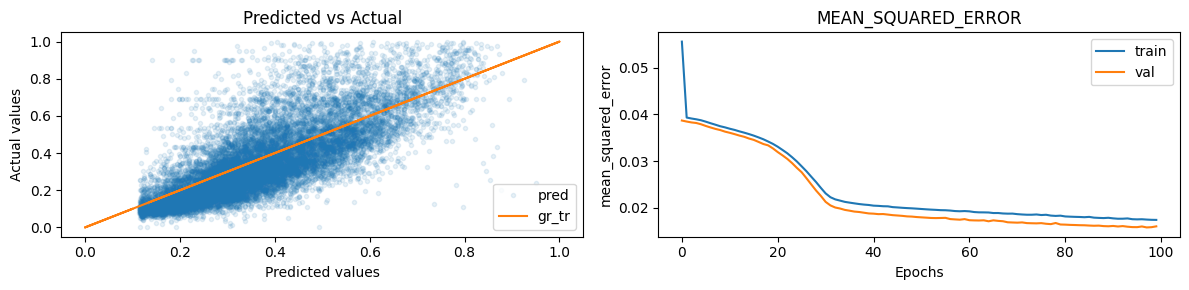

{'LOSS': 0.01737109012901783, 'MEAN_SQUARED_ERROR': 0.01737109012901783, 'VAL_LOSS': 0.015985779464244843, 'VAL_MEAN_SQUARED_ERROR': 0.015985779464244843}
INITIAL LEARNING RATE:  0.001
DECAY RATE:  0.1
461/461 [==============================] - 2s 4ms/step


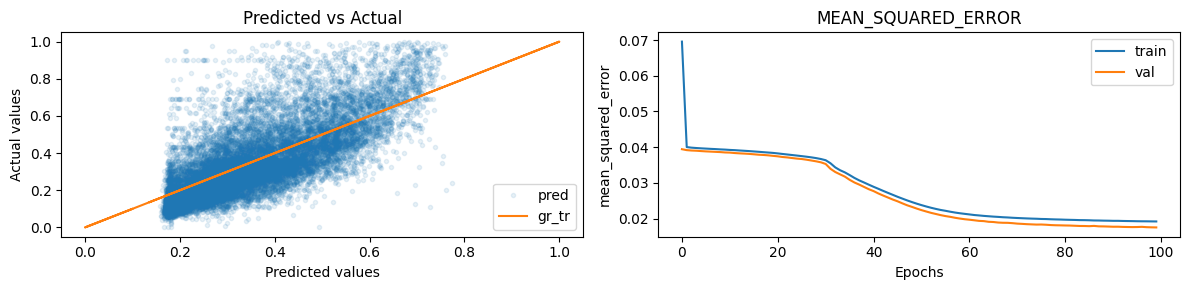

{'LOSS': 0.01917564682662487, 'MEAN_SQUARED_ERROR': 0.01917564682662487, 'VAL_LOSS': 0.017502514645457268, 'VAL_MEAN_SQUARED_ERROR': 0.017502514645457268}


In [ ]:
evaluate_optimizer_and_learning_rate(initial_learning_rates, decay_rates, 'SGDM_Small', 100, [x_train_n, y_train_n], 'sgd_small_learning_rate_table', load_from_file)

INITIAL LEARNING RATE:  0.1
DECAY RATE:  1
461/461 [==============================] - 2s 4ms/step


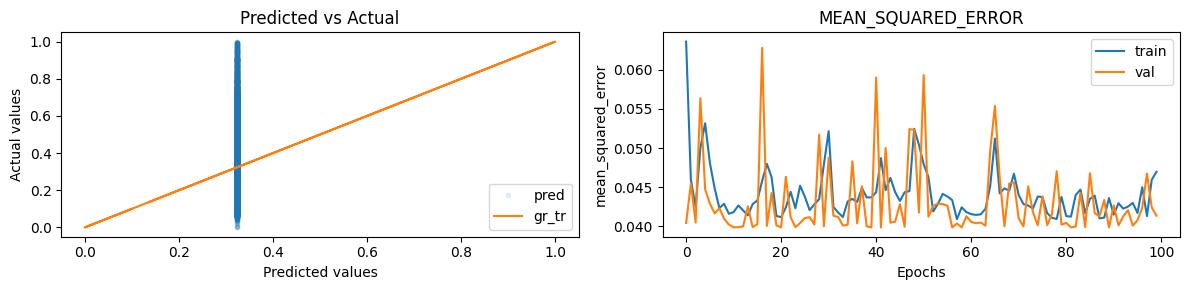

{'LOSS': 0.04695725813508034, 'MEAN_SQUARED_ERROR': 0.04695725813508034, 'VAL_LOSS': 0.041324105113744736, 'VAL_MEAN_SQUARED_ERROR': 0.041324105113744736}
INITIAL LEARNING RATE:  0.1
DECAY RATE:  0.96
461/461 [==============================] - 2s 4ms/step


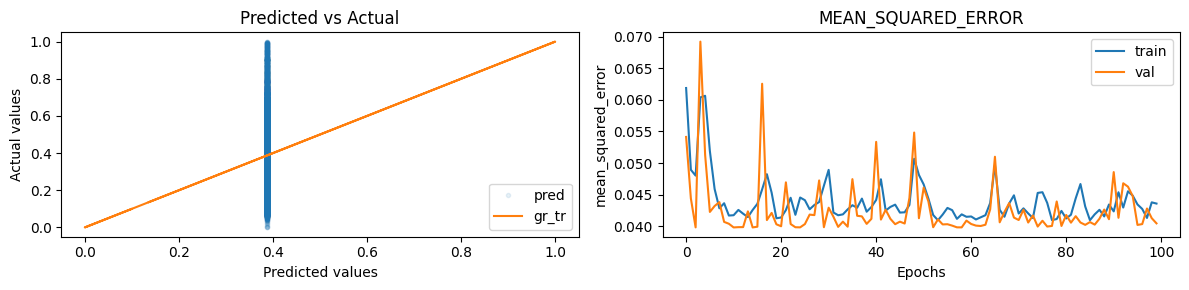

{'LOSS': 0.04359763115644455, 'MEAN_SQUARED_ERROR': 0.04359763115644455, 'VAL_LOSS': 0.04046868532896042, 'VAL_MEAN_SQUARED_ERROR': 0.04046868532896042}
INITIAL LEARNING RATE:  0.1
DECAY RATE:  0.1
461/461 [==============================] - 2s 4ms/step


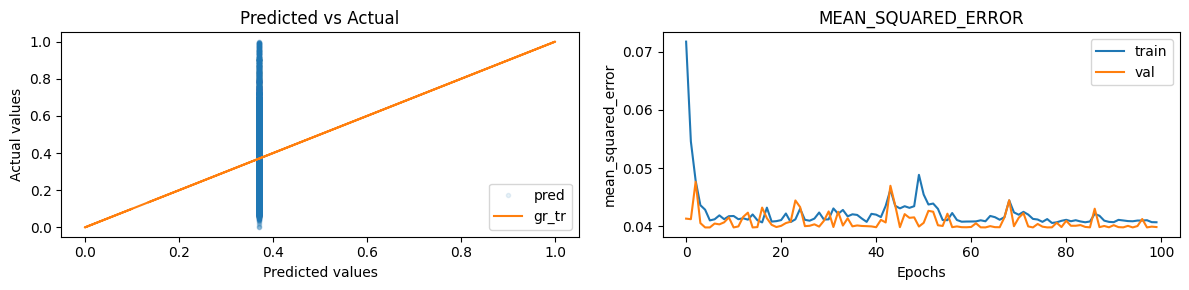

{'LOSS': 0.04071091488003731, 'MEAN_SQUARED_ERROR': 0.04071091488003731, 'VAL_LOSS': 0.03988713398575783, 'VAL_MEAN_SQUARED_ERROR': 0.03988713398575783}
INITIAL LEARNING RATE:  0.01
DECAY RATE:  1
461/461 [==============================] - 2s 3ms/step


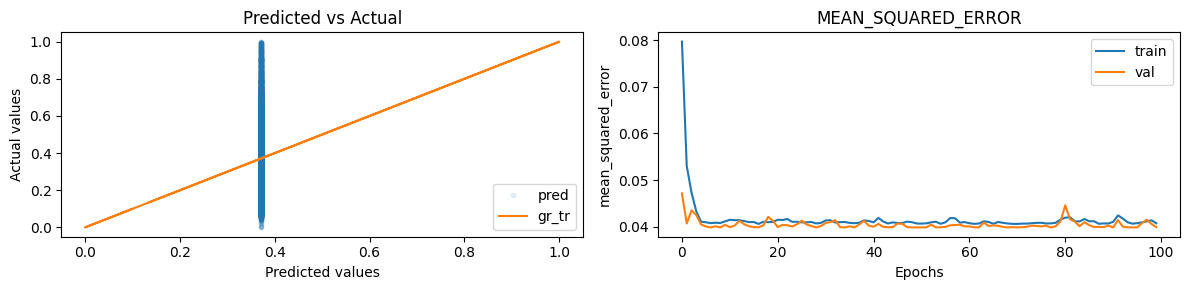

{'LOSS': 0.04072994738817215, 'MEAN_SQUARED_ERROR': 0.04072994738817215, 'VAL_LOSS': 0.03989453241229057, 'VAL_MEAN_SQUARED_ERROR': 0.03989453241229057}
INITIAL LEARNING RATE:  0.01
DECAY RATE:  0.96
461/461 [==============================] - 2s 3ms/step


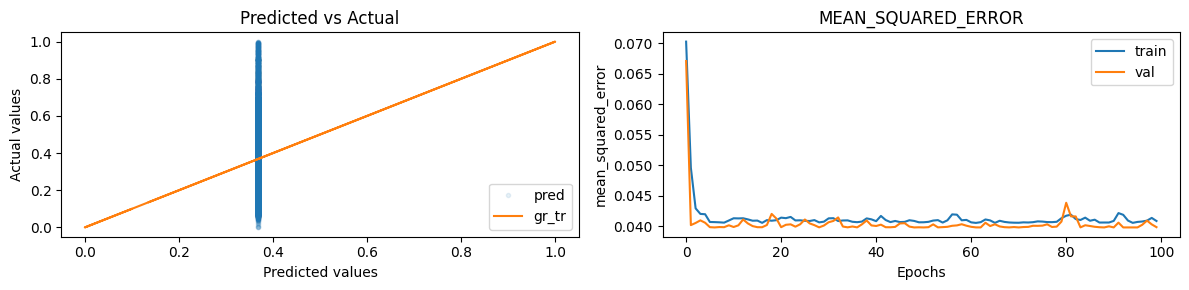

{'LOSS': 0.04087740182876587, 'MEAN_SQUARED_ERROR': 0.04087740182876587, 'VAL_LOSS': 0.0398692786693573, 'VAL_MEAN_SQUARED_ERROR': 0.0398692786693573}
INITIAL LEARNING RATE:  0.01
DECAY RATE:  0.1
461/461 [==============================] - 1s 3ms/step


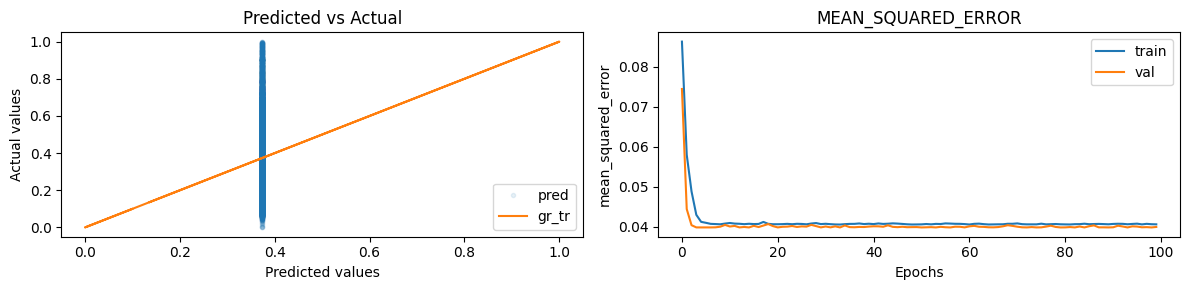

{'LOSS': 0.04059871658682823, 'MEAN_SQUARED_ERROR': 0.04059871658682823, 'VAL_LOSS': 0.0399429090321064, 'VAL_MEAN_SQUARED_ERROR': 0.0399429090321064}
INITIAL LEARNING RATE:  0.001
DECAY RATE:  1
461/461 [==============================] - 2s 3ms/step


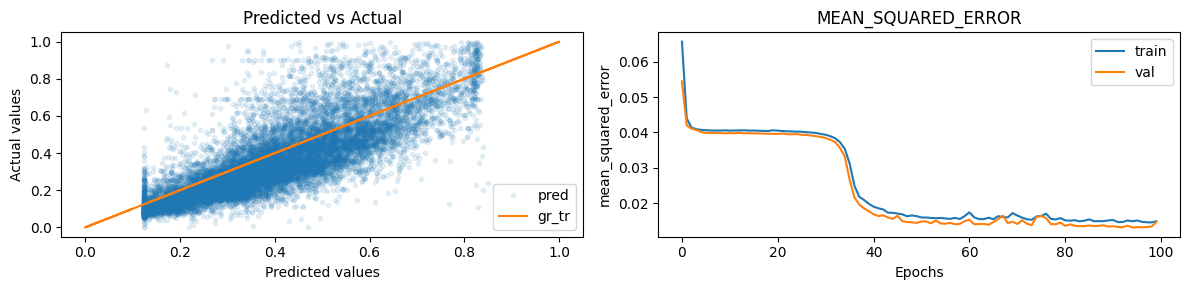

{'LOSS': 0.014877373352646828, 'MEAN_SQUARED_ERROR': 0.014877373352646828, 'VAL_LOSS': 0.01463787816464901, 'VAL_MEAN_SQUARED_ERROR': 0.01463787816464901}
INITIAL LEARNING RATE:  0.001
DECAY RATE:  0.96
461/461 [==============================] - 2s 3ms/step


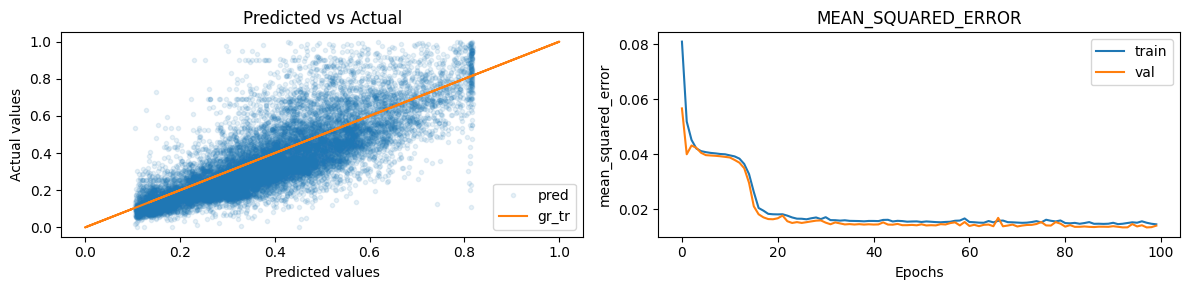

{'LOSS': 0.014572233892977238, 'MEAN_SQUARED_ERROR': 0.014572233892977238, 'VAL_LOSS': 0.014094552956521511, 'VAL_MEAN_SQUARED_ERROR': 0.014094552956521511}
INITIAL LEARNING RATE:  0.001
DECAY RATE:  0.1
461/461 [==============================] - 1s 2ms/step


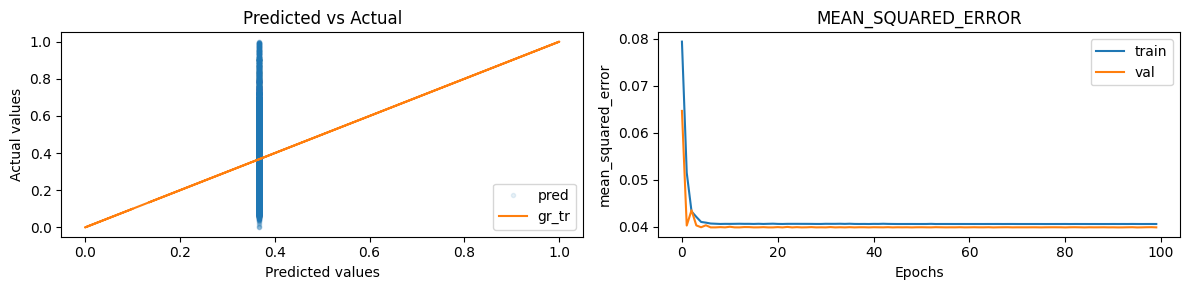

{'LOSS': 0.04054008796811104, 'MEAN_SQUARED_ERROR': 0.04054008796811104, 'VAL_LOSS': 0.03982529044151306, 'VAL_MEAN_SQUARED_ERROR': 0.03982529044151306}


In [ ]:
evaluate_optimizer_and_learning_rate(initial_learning_rates, decay_rates, 'SGDM_Large', 100, [x_train_n, y_train_n], 'sgd_large_learning_rate_table', load_from_file)

In [ ]:
from latex_export_functions import save_latex_table_json_optimizer

save_latex_table_json_optimizer('adam_learning_rate_table')
save_latex_table_json_optimizer('sgd_learning_rate_table')
save_latex_table_json_optimizer('sgd_large_learning_rate_table')
save_latex_table_json_optimizer('sgd_small_learning_rate_table')

### Final Training and Plots

In [ ]:
def create_and_train_final_model(*args):
    layer_sizes, activation_function, epochs, optimizer, loss_function, error_functions, model_name, dataset, load_from_file = args
    x_train_n, y_train_n = dataset

    model_file = '{}/{}.h5'.format('saved_models', model_name)
    history_file = '{}/{}_history.pkl'.format('saved_models', model_name)
    
    model = initialize_sequential_model(layer_sizes, activation_function)

    if load_from_file and os.path.exists(model_file) and os.path.exists(history_file):
        model = load_model(model_file)
        with open(history_file, 'rb') as file:
            history = pickle.load(file)
        print(f"Model and history loaded from '{model_name}'")
        print(history)
    else:
        model.compile(loss=loss_function, 
                    optimizer= optimizer,
                    metrics= error_functions
                    )
        history = model.fit(x_train_n[:,:], #training data
                        y_train_n[:],  #Labels
                        epochs=epochs,
                        batch_size=128,
                        verbose=0,
                        validation_split = 0
                    ).history
        print(f"New model created and trained: {model_file}")

        model.save(model_file)
        with open(history_file, 'wb') as file:
            pickle.dump(history, file)
        print(f"Model and history saved as '{model_file}'")  

    return model, history




def evaluate_full_dataset_architecture(layers, activation_function, optimizer, num_epochs, loss_function, dataset, test_set, file_name, load_from_file):
    x_train_n, y_train_n  = dataset 
    x_test_n, y_test_n = test_set
    model_name = 'final_model'
    m_train, h_train= create_and_train_final_model(layers, activation_function, num_epochs, optimizer, loss_function, error_functions, model_name, dataset, load_from_file)
    labels_predicted_train = m_train.predict(x_train_n)
    m_test, h_test= create_and_train_final_model(layers, activation_function, num_epochs, optimizer, loss_function, error_functions, model_name, test_set, True)
    labels_predicted_test = m_train.predict(x_test_n)

    visualize_and_plot(labels_predicted_train, y_train_n, loss_function, h_train)
    table_training = evaluate_model_on_final_epoch(h_train)

    visualize_and_plot(labels_predicted_test, y_test_n, loss_function, h_test)
    table_test = evaluate_model_on_final_epoch(h_test)


    with open('json_outputs\\{}-{}.json'.format(file_name, 'training_set'), 'w') as file:
        json.dump(table_training, file, indent=4)
    with open('json_outputs\\{}-{}.json'.format(file_name, 'test_set'), 'w') as file:
        json.dump(table_test, file, indent=4)


        

TRAINING SET PERFORMANCE
461/461 [==============================] - 1s 1ms/step


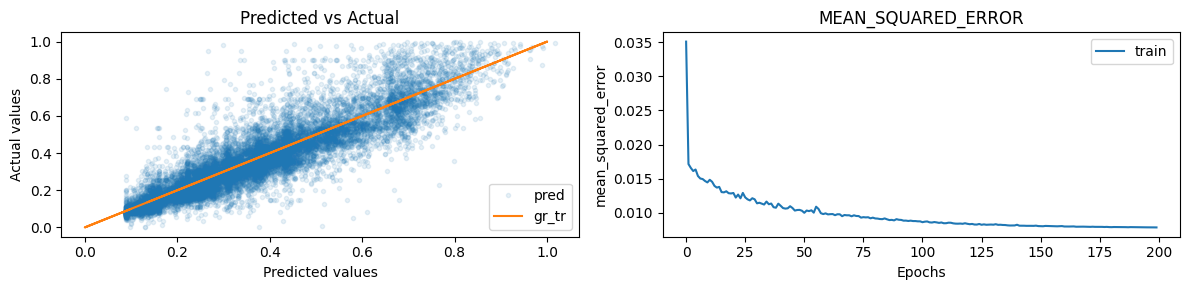

{'LOSS': 0.00784438569098711, 'MEAN_SQUARED_ERROR': 0.00784438569098711}
TEST SET PERFORMANCE
154/154 [==============================] - 0s 1ms/step


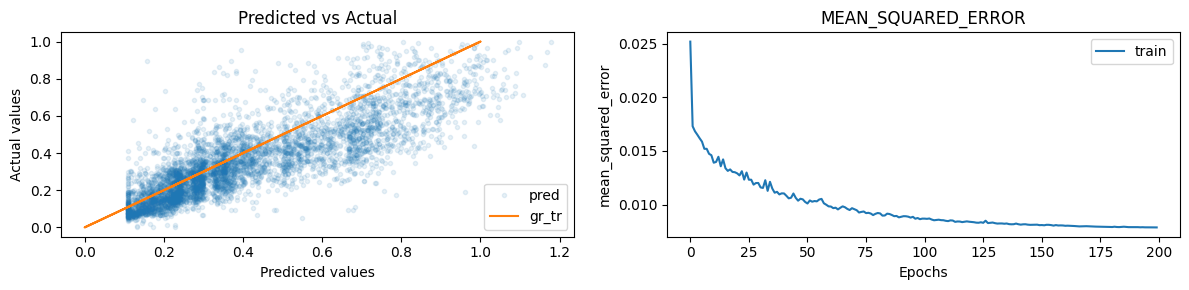

{'LOSS': 0.007888979278504848, 'MEAN_SQUARED_ERROR': 0.007888979278504848}


In [ ]:
num_epochs = 200
layers = [16, 32, 64, 128, 256, 128, 64, 32, 16, 8, 4, 1]
activation_function = 'relu'
loss_function = 'mean_squared_error'  
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate=0.01,
                decay_steps=10000,
                decay_rate= 0.1) 
optimizer = Adam(learning_rate=lr_schedule)
load_from_file = False
evaluate_full_dataset_architecture(layers, activation_function, optimizer, 200, loss_function, 
                                   [x_train_n, y_train_n], [x_test_n, y_test_n], 'final_training', load_from_file)


In [ ]:
from latex_export_functions import create_latex_table_from_json_final_training

create_latex_table_from_json_final_training('final_training_training_set', 'final_training_test_set')

### Change to Classification Neural Network